In [1]:
# Import necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import math

# Import scikit-learn modules
from sklearn import datasets
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV

In [2]:
Power_Consumption=pd.read_csv("C:\Sravan ML\Machine_Learning\Linear Regression\household_power_consumption.txt", delimiter=';')

C:\Windows\Temp\ipykernel_20512\467313659.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  Power_Consumption=pd.read_csv("C:\Sravan ML\Machine_Learning\Linear Regression\household_power_consumption.txt", delimiter=';')


In [3]:
Power_Consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [4]:
Power_Consumption.shape

(2075259, 9)

In [5]:
Power_Consumption.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [6]:
# Columns to convert to numeric
columns_to_convert = ['Global_active_power', 'Global_reactive_power', 
                      'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']

# Replace '?' with NaN
Power_Consumption = Power_Consumption.replace('?', np.nan)

# Convert columns to numeric
Power_Consumption[columns_to_convert] = Power_Consumption[columns_to_convert].apply(pd.to_numeric)


In [7]:
Power_Consumption_Drop_Nan=Power_Consumption.dropna()
# Find NaN values in the DataFrame
nan_values = Power_Consumption_Drop_Nan.isna()

# Count NaN values in each column
nan_counts_per_column = nan_values.sum()

# Count NaN values in each row
nan_counts_per_row = nan_values.sum(axis=1)

# Display the results
print("NaN counts per column:")
print(nan_counts_per_column)

print("\nNaN counts per row:")
print(nan_counts_per_row)

NaN counts per column:
Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

NaN counts per row:
0          0
1          0
2          0
3          0
4          0
          ..
2075254    0
2075255    0
2075256    0
2075257    0
2075258    0
Length: 2049280, dtype: int64


In [8]:
Power_Consumption_Drop_Nan.info()
# Drop the column named 'Sub_metering_3'
df = Power_Consumption_Drop_Nan.drop('Sub_metering_3', axis=1)
df

<class 'pandas.core.frame.DataFrame'>
Index: 2049280 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 156.3+ MB


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0
...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0


In [9]:
# Exclude non-numeric columns
numeric_df1 = df.select_dtypes(include=['float64'])

# Compute the correlation matrix
correlation_matrix = numeric_df1.corr()
 
# Extract the correlation values with the target variable (e.g., 'price')
correlation_with_active_power = correlation_matrix['Global_active_power']
 
# Identify variables with positive correlation
positive_correlation = correlation_with_active_power[correlation_with_active_power > 0]
 
# Display the variables with positive correlation
print("Variables with Positive Correlation:")
print(positive_correlation)    

Variables with Positive Correlation:
Global_active_power      1.000000
Global_reactive_power    0.247017
Global_intensity         0.998889
Sub_metering_1           0.484401
Sub_metering_2           0.434569
Name: Global_active_power, dtype: float64


In [10]:
x = df[['Global_intensity', 'Sub_metering_1', 'Sub_metering_2']]
y = df['Global_active_power']
print(x, y)

         Global_intensity  Sub_metering_1  Sub_metering_2
0                    18.4             0.0             1.0
1                    23.0             0.0             1.0
2                    23.0             0.0             2.0
3                    23.0             0.0             1.0
4                    15.8             0.0             1.0
...                   ...             ...             ...
2075254               4.0             0.0             0.0
2075255               4.0             0.0             0.0
2075256               3.8             0.0             0.0
2075257               3.8             0.0             0.0
2075258               3.8             0.0             0.0

[2049280 rows x 3 columns] 0          4.216
1          5.360
2          5.374
3          5.388
4          3.666
           ...  
2075254    0.946
2075255    0.944
2075256    0.938
2075257    0.934
2075258    0.932
Name: Global_active_power, Length: 2049280, dtype: float64


In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=21)
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(x_train)
y_test=np.array(x_test)

Text(0, 0.5, "'Global_active_power'")

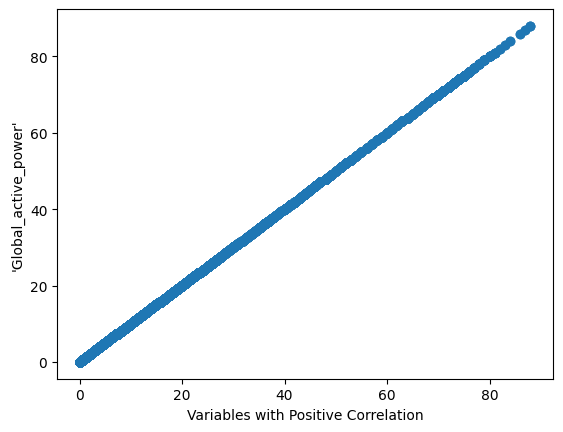

In [17]:
plt.scatter(x_train, y_train)
plt.xlabel("Variables with Positive Correlation")
plt.ylabel("'Global_active_power'")  

In [18]:
lr=LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [19]:
c=lr.intercept_
c

array([-8.75921558e-12, -4.45310455e-12, -1.09290355e-12])

In [20]:
m=lr.coef_
m

array([[ 1.00000000e+00, -8.09791564e-16, -7.52322638e-16],
       [ 1.49875354e-12,  1.00000000e+00, -1.77635684e-15],
       [ 4.38588492e-13, -1.22790667e-13,  1.00000000e+00]])

In [21]:
y_pred_train=lr.predict(x_train)
y_pred_train.flatten()

array([ 7.20000000e+00,  6.33792095e-12,  2.06493360e-12, ...,
        1.00000000e+00, -2.95435101e-12, -6.54315053e-13])

Text(0, 0.5, 'Gold_Price')

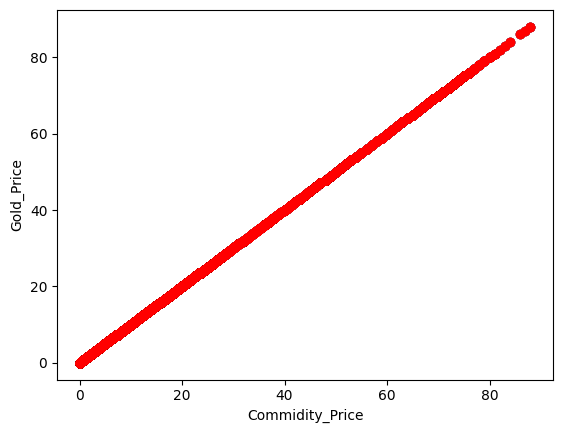

In [22]:
plt.scatter(x_train,y_train)
plt.scatter(x_train,y_pred_train,color="red")
plt.xlabel("Commidity_Price")
plt.ylabel("Gold_Price")

In [23]:
y_pred_test=lr.predict(x_test)
y_pred_test.flatten()

array([ 1.72000000e+01,  3.90000000e+01,  1.66198253e-12, ...,
        8.00000000e-01, -3.25410172e-12, -7.42032752e-13])

Text(0, 0.5, 'Gold_Price')

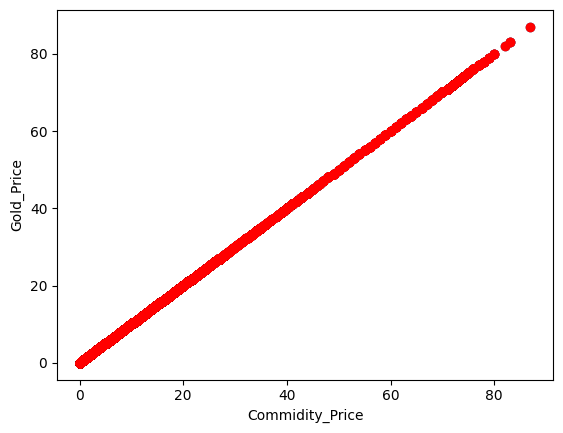

In [24]:
plt.scatter(x_test,y_test)
plt.scatter(x_test,y_pred_test,color="red")
plt.xlabel("Commidity_Price")
plt.ylabel("Gold_Price")

In [25]:
# MSE
mse = mean_squared_error(y_test, y_pred_test)
# RMSE
rmse = math.sqrt(mse)
# MAE
mae = mean_absolute_error(y_test, y_pred_test)
# R2
r2 = r2_score(y_test, y_pred_test)
# print them all
print("MSE --> ", mse)
print("RMSE --> ", rmse)
print("MAE --> ", mae)

print("R2 --> ", r2)           

MSE -->  7.429777779071231e-23
RMSE -->  8.619615872572994e-12
MAE -->  4.6229951191131474e-12
R2 -->  1.0


In [26]:
print ("Training Data Score:"+str(lr.score(x_train,y_train)))
print ("Testing Data Score:"+str(lr.score(x_test,y_test)))

Training Data Score:1.0
Testing Data Score:1.0


In [27]:
# Generate some sample data for demonstration purposes
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train a Ridge regression model
ridge = Ridge(alpha=1.0)  # Adjust alpha to control the strength of regularization
ridge.fit(X_train_scaled, y_train)

# Evaluate the model
training_score = ridge.score(X_train_scaled, y_train)
testing_score = ridge.score(X_test_scaled, y_test)

print("Training Data Score:", training_score)
print("Testing Data Score:", testing_score)


Training Data Score: 0.9999981749336235
Testing Data Score: 0.9999981395439939


In [28]:
from sklearn.model_selection import GridSearchCV

# Define a range of alpha values to search
param_grid = {'alpha': [0.1, 1.0, 10.0]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(Ridge(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best alpha value found by grid search
best_alpha = grid_search.best_params_['alpha']
print("Best Alpha:", best_alpha)

# Initialize Ridge regression with the best alpha value
ridge_tuned = Ridge(alpha=best_alpha)
ridge_tuned.fit(X_train_scaled, y_train)

# Evaluate the tuned model
training_score_tuned = ridge_tuned.score(X_train_scaled, y_train)
testing_score_tuned = ridge_tuned.score(X_test_scaled, y_test)

print("Tuned Training Data Score:", training_score_tuned)
print("Tuned Testing Data Score:", testing_score_tuned)


Best Alpha: 0.1
Tuned Training Data Score: 0.9999997213669668
Tuned Testing Data Score: 0.999999692385287


In [29]:
# Coefficients and intercept
M = ridge_tuned.coef_
c = ridge_tuned.intercept_


# Predictions on training and testing data
y_train_pred = ridge_tuned.predict(X_train_scaled)
y_test_pred = ridge_tuned.predict(X_test_scaled)

# Calculate evaluation metrics
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate RMSE
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print("Coefficients (M):", M)
print("Intercept (c):", c)
print("Training Data Metrics:")
print("Mean Squared Error:", mse_train)
print("Mean Absolute Error:", mae_train)
print("R-squared Score:", r2_train)
print("Root Mean Squared Error:", rmse_train)
print("\nTesting Data Metrics:")
print("Mean Squared Error:", mse_test)
print("Mean Absolute Error:", mae_test)
print("R-squared Score:", r2_test)
print("Root Mean Squared Error:", rmse_test)  


Coefficients (M): [ 7.96945744e+01  9.31390991e+01  5.67156132e+00  4.19862695e-03
  8.58701279e+01 -3.61667566e-03  7.04765906e+01  1.92017668e-03
  1.87587310e-03 -3.13003169e-03  1.86840940e+01  3.99780164e+01
  2.10937567e-03  3.10698762e+00 -4.77934558e-03  2.57710783e+01
 -4.47723087e-03  8.65973753e+01  3.13168951e-03  2.11144557e-03]
Intercept (c): 0.36358698132369405
Training Data Metrics:
Mean Squared Error: 0.010505294276315634
Mean Absolute Error: 0.08201916423456374
R-squared Score: 0.9999997213669668
Root Mean Squared Error: 0.10249533782721844

Testing Data Metrics:
Mean Squared Error: 0.011907364202212375
Mean Absolute Error: 0.08615520312614602
R-squared Score: 0.999999692385287
Root Mean Squared Error: 0.10912086969142235


In [32]:
# Define a range of alpha values to search
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(Ridge(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best alpha value found by grid search
best_alpha = grid_search.best_params_['alpha']
print("Best Alpha:", best_alpha)

# Initialize Ridge regression with the best alpha value
ridge_tuned = Ridge(alpha=best_alpha)

# Fit the Ridge model
ridge_tuned.fit(X_train, y_train)

# Predictions on training and testing data
y_train_pred = ridge_tuned.predict(X_train)
y_test_pred = ridge_tuned.predict(X_test)

# Evaluate the tuned model
training_score_tuned = ridge_tuned.score(X_train, y_train)
testing_score_tuned = ridge_tuned.score(X_test, y_test)

print("Tuned Training Data Score:", training_score_tuned)
print("Tuned Testing Data Score:", testing_score_tuned)


Best Alpha: 0.001
Tuned Training Data Score: 0.9999997370220295
Tuned Testing Data Score: 0.9999997048146031


In [34]:
# Coefficients and intercept
M = ridge_tuned.coef_
c = ridge_tuned.intercept_

# Predictions on training and testing data
y_train_pred = ridge_tuned.predict(X_train)
y_test_pred = ridge_tuned.predict(X_test)

# Calculate evaluation metrics
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate RMSE
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print("Coefficients (M):", M)
print("Intercept (c):", c)
print("\nTraining Data Metrics:")
print("Mean Squared Error:", mse_train)
print("Mean Absolute Error:", mae_train)
print("R-squared Score:", r2_train)
print("Root Mean Squared Error:", rmse_train)
print("\nTesting Data Metrics:")
print("Mean Squared Error:", mse_test)
print("Mean Absolute Error:", mae_test)
print("R-squared Score:", r2_test)
print("Root Mean Squared Error:", rmse_test)


Coefficients (M): [ 7.99995594e+01  9.85805075e+01  5.56540098e+00  3.26486361e-03
  8.64663179e+01 -3.90517790e-03  6.94319394e+01  1.10419943e-03
  2.28966183e-03 -3.60047625e-03  1.86105405e+01  3.96347597e+01
  1.48488879e-03  3.10287470e+00 -4.62752578e-03  2.63867874e+01
 -3.26218042e-03  8.68821291e+01  2.52530473e-03  1.99091976e-03]
Intercept (c): -0.0032529842404844245

Training Data Metrics:
Mean Squared Error: 0.009915051841766657
Mean Absolute Error: 0.0799523928743331
R-squared Score: 0.9999997370220295
Root Mean Squared Error: 0.09957435333340939

Testing Data Metrics:
Mean Squared Error: 0.011426241591702122
Mean Absolute Error: 0.08467845767274661
R-squared Score: 0.9999997048146031
Root Mean Squared Error: 0.10689359939539
